In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from astropy.io import ascii
from scipy.integrate import simps
from scipy.integrate import cumtrapz
from matplotlib.ticker import ScalarFormatter
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import interp1d
rcParams.update({'xtick.major.pad': '6.0'})
rcParams.update({'xtick.major.size': '5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '6.0'})
rcParams.update({'xtick.minor.size': '5'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '5.0'})
rcParams.update({'ytick.major.size': '5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '5.0'})
rcParams.update({'ytick.minor.size': '5'}) 
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 12})
rcParams['axes.linewidth'] = 1.5

In [2]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
data = ascii.read('/home/kaiwen/work/data/c3_catalog/var_X_ozdes.vot')
Name = data['col5']

## Make output for DES

In [117]:
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field

# Create a new VOTable file...
votable = VOTableFile()

# ...with one resource...
resource = Resource()
votable.resources.append(resource)

# ... with one table
table = Table(votable)
resource.tables.append(table)

# Define some fields
col = ['ra','dec','type','mass','name','z','flag','MJD']
for i in range(2):
    table.fields.extend([Field(votable, name = col[i],datatype='double')])
table.fields.extend([Field(votable, name = col[2],datatype='string',arraysize='*')])
table.fields.extend([Field(votable, name = col[3],datatype='double')])
table.fields.extend([Field(votable, name = col[4],datatype='string',arraysize='*')])
table.fields.extend([Field(votable, name = col[5],datatype='double')])
table.fields.extend([Field(votable, name = col[6],datatype='double')])
table.fields.extend([Field(votable, name = col[7],datatype='string',arraysize='*')])

In [122]:
table.create_arrays(len(name))
for i in range(len(name)):
    try:
        hdul = fits.open('/home/kaiwen/work/data/c3_catalog/ozdes_v3/dr2/spectra/2dF_AAOmega_x5700_x6700/'+name[i]+'.fits')
    except:
        hdul = fits.open('/home/kaiwen/work/data/c3_catalog/ozdes_v3/dr2/spectra/2dF_AAOmega_x5700/'+name[i]+'.fits')

    n_ep = len(hdul)/3 - 1
    MJDs = ''
    for j in range(len(hdul)):
        if j != 0 and j%3 == 0:
            MJDs += str(hdul[j].header['UTMJD'])
            if j != len(hdul) - 3:
                MJDs += ','            
    line = [data['col1'][i],data['col2'][i],data['col3'][i],data['col4'][i],data['col5'][i],data['col6'][i],data['col7'][i],MJDs]
    table.array[i] = tuple(line)

In [123]:
# Now write the whole thing to a file.
# Note, we have to use the top-level votable file object
votable.to_xml("/home/kaiwen/work/test.vot")

In [100]:
file_write = open('/home/kaiwen/work/data/c3_catalog/OG/data/OzDES_AGN.txt','w')
for i in range(0,len(data)):
    if data['col5'][i][:4] == 'SVA1':
        file_write.write(data['col5'][i][11:]+'\n')
file_write.close()

In [47]:
file_write = open('/home/kaiwen/work/data/c3_catalog/OG/data/redshift.txt','w')
for i in range(0,len(data)):
    if data['col5'][i][:4] == 'SVA1':
        file_write.write(str(data['col6'][i])+'\n')
file_write.close()

In [49]:
data_mag = ascii.read('/home/kaiwen/work/data/c3_catalog/des_c3_varXozdes_v6_mags _v2.dat')
data_mjd = ascii.read('/home/kaiwen/work/test.vot')

In [105]:
for i in range(len(data)):
    if data['col5'][i][:4] != 'SVA1':
        continue
        
    file_write = open('/home/kaiwen/work/data/c3_catalog/OG/data/'+data['col5'][i][11:]+'_lc.dat','w')
    file_write.write('Date Mag Mag_err Band'+'\n')
    
    mjds = data_mjd['col8'][i].split(',')
    g_mag = data_mag['col6'][i].split(',')
    r_mag = data_mag['col7'][i].split(',')
    i_mag = data_mag['col8'][i].split(',')
    g_magerr = data_mag['col9'][i].split(',')
    r_magerr = data_mag['col10'][i].split(',')
    i_magerr = data_mag['col11'][i].split(',')
    #print(len(mjds),len(g_magerr))
    
    file_write.write(str(float(mjds[0])-0.1)+' '+str(g_mag[0])+' '+str(g_magerr[0])+' '+'g'+'\n')
    for j in range(0,len(mjds)):
        file_write.write(str(float(mjds[j]))+' '+str(g_mag[j])+' '+str(g_magerr[j])+' '+'g'+'\n')
    file_write.write(str(float(mjds[len(mjds)-1])+0.1)+' '+str(g_mag[len(mjds)-1])+' '+str(g_magerr[len(mjds)-1])+' '+'g'+'\n')
    file_write.write(str(float(mjds[0])-0.1)+' '+str(r_mag[0])+' '+str(r_magerr[0])+' '+'r'+'\n')
    for j in range(0,len(mjds)):
        file_write.write(str(float(mjds[j]))+' '+str(r_mag[j])+' '+str(r_magerr[j])+' '+'r'+'\n')
    file_write.write(str(float(mjds[len(mjds)-1])+0.1)+' '+str(r_mag[len(mjds)-1])+' '+str(r_magerr[len(mjds)-1])+' '+'r'+'\n')
    file_write.write(str(float(mjds[0])-0.1)+' '+str(i_mag[0])+' '+str(i_magerr[0])+' '+'i'+'\n')
    for j in range(0,len(mjds)):
        file_write.write(str(float(mjds[j])+0.01)+' '+str(i_mag[j])+' '+str(i_magerr[j])+' '+'i'+'\n')
    file_write.write(str(float(mjds[len(mjds)-1])+0.1)+' '+str(i_mag[len(mjds)-1])+' '+str(i_magerr[len(mjds)-1])+' '+'i'+'\n')
    file_write.close()

## DES Mag input

In [6]:
data_mag = ascii.read('/home/kaiwen/work/data/c3_catalog/des_c3_varXozdes_v6_mags _v2.dat')
data_mjd = ascii.read('/home/kaiwen/work/test.vot')

In [7]:
G_mag = data_mag['col6']
R_mag = data_mag['col7']
I_mag = data_mag['col8']
G_magerr = data_mag['col9']
R_magerr = data_mag['col10']
I_magerr = data_mag['col11']
mjds =  data_mjd['col8']

## OZDES calibration

In [8]:
def cal_flux(flux,lamda,lamda_all,var,T):
    # Calculate OZDES flux with DES transmission function
    c = 2.992792e18
    tmp_num = np.nansum(np.array(flux)*np.array(T)*lamda)
    #tmp_num = simps(np.array(flux)*np.array(T)*lamda,lamda)
    #print(flux)
    if tmp_num < 0:
        index = np.where((flux > 0), True, False)
        #print(flux)
        flux = np.interp(lamda,flux[index],lamda[index])
        tmp_num = np.nansum(flux*T*lamda)
        
    tmp_den = c * np.nansum(np.array(T)/lamda)
    #tmp_den = c * simps(np.array(T)/lamda,lamda)
    tmp = -2.5 * np.log10(tmp_num / tmp_den) - 48.60
    
    var = np.interp(lamda,lamda_all,var)
    num_var = np.nansum(var * (flux * lamda) ** 2)
    tmp_var = 1.17882 * num_var / (tmp_num ** 2)
    
    #print(tmp_num)
    return tmp,tmp_var

In [121]:
def cal_ratio(a,b,a_err,b_err):
    # Calculate scale ratio for DES gri bands
    scale = np.power(10., 0.4 * (a - b))
    scale_err = abs(b_err + a_err ) * (scale * 0.4 * 2.3) ** 2
    return scale,scale_err

In [122]:
def cal_scale_factor(scale,scale_err,lamda,lamdas,var):
    scale = np.array(scale)
    scale_err = np.array(scale_err)
    # using 2-d polynomials to construct scale factor for OZDES spectra
    fn_raw = np.polyfit(lamdas,scale,2)
    fn = np.poly1d(fn_raw)
    flux_calib = fn(lamda)
    
    # Calculate the variance for calibrated spectra
    # add in Gaussian process to estimate uncertainties, /10**-17 because it gets a bit panicky if you use small numbers
    stddev = (scale_err ** 0.5) / 10 ** -17
    scale_v = scale / 10 ** -17

    kernel = kernels.RBF(length_scale=300, length_scale_bounds=(.01, 2000.0))
    gp = GaussianProcessRegressor(kernel=kernel, alpha=stddev**2)

    xprime = np.atleast_2d(lamdas).T
    yprime = np.atleast_2d(scale_v).T
    gp.fit(xprime, yprime)
    xplot_prime = np.atleast_2d(lamda).T
    y_pred, sigma = gp.predict(xplot_prime, return_std=True)
    y_pred = y_pred[:,0]
    sigModel = (sigma/y_pred)*flux_calib

    # now scale the original variance and combine with scale factor uncertainty
    varScale = var * pow(flux_calib, 2) + sigModel ** 2
    return flux_calib, varScale

In [123]:
filter_all = {}
for i in ['g','r','i']:
    tmp = ascii.read('/home/kaiwen/work/data/c3_catalog/filters/CTIO_DECam.%s.dat' %i)
    tmp_lamda = 'lamda_'+i
    tmp_t = 'T_'+i
    filter_all[tmp_lamda] = np.array(tmp['col1'])
    filter_all[tmp_t] = np.array(tmp['col2'])

In [126]:
lamda_all = []
step = 1.037739939825
ref = 6295.027832
for i in range(2470):
    lamda_all.append(ref - i*step)
for i in range(1,2531):
    lamda_all.append(ref + i*step)
lamda_all.sort()

lamda_all_red = []
step = 1.037739939825
ref = 6295.027832
for i in range(2470):
    lamda_all_red.append(ref - i*step)
for i in range(1,3531):
    lamda_all_red.append(ref + i*step)
lamda_all_red.sort()

lamda_eff = [4770.83, 6371.33, 7774.19]

In [42]:
def cal_mag(flux):
    mag = 22.5 - np.log10(flux)
    return mag
f_g = cal_mag(344698.0)
f_r = cal_mag(9.576010e+05)
f_i = cal_mag(1.076850e+06)
print(f_g,f_r,f_i)

(16.962561236439697, 16.518815409077988, 16.46784478761122)


In [127]:
for k in range(72):
    #print(Name[k])
    
    g_mag = G_mag[k].split(',')
    r_mag = R_mag[k].split(',')
    i_mag = I_mag[k].split(',')
    g_magerr = G_magerr[k].split(',')
    r_magerr = R_magerr[k].split(',')
    i_magerr = I_magerr[k].split(',')
    
    name = Name[k]
    try:
        hdul = fits.open('/home/kaiwen/work/data/c3_catalog/ozdes_v3/dr2/spectra/2dF_AAOmega_x5700_x6700/'+ name +'.fits')
        flag = 1
    except: 
        hdul = fits.open('/home/kaiwen/work/data/c3_catalog/ozdes_v3/dr2/spectra/2dF_AAOmega_x5700/'+ name +'.fits')
        flag = 0 # means in x5700_x6700 directory where the spectra are redder
    
    '''
    g_mag = [17.002]
    r_mag = [17.103]
    i_mag = [16.416]
    g_magerr = [0.1]
    r_magerr = [0.1]
    i_magerr = [0.1]
    hdul = fits.open('/home/kaiwen/work/data/c3_catalog/SVA1_COADD-2937961955.fits')
    flag = 0'''
    
    Hdul = fits.HDUList([])
    x = mjds[k].split(',')
    n_ep = len(hdul)/3 - 1
    for i in range(n_ep):
        # Get instrumental flux using DES gri bands
        index = np.where((hdul[3+3*i+2].data == 0), True, False)
        if flag == 0:
            lamda1 = np.array(lamda_all)
        elif flag == 1:
            lamda1 = np.array(lamda_all_red)
        lamda = lamda1[index]
        
        if len(lamda) <= 4500:
            x[i] = -99
            continue
        
        if lamda[0] > 4000:
            flux1 = hdul[3+3*i].data
            lamda = np.array(lamda1)
            var = hdul[3+3*i+1].data
        else:
            flux1 = hdul[3+3*i].data[index]
            var = hdul[3+3*i+1].data[index]

        #flux1 = hdul[3+3*i].data[index]
        #lamda = np.array(lamda_all)
        #flux = np.interp(lamda,lamda[index],flux1)
        #var = hdul[3+3*i+1].data[index]
        #pos = np.where((flux2 >= 0), True, False)
        #flux = np.interp(lamda,lamda[pos],flux2[pos])

        T_g = filter_all['lamda_g']
        T_r = filter_all['lamda_r']
        T_i = filter_all['lamda_i']
        
        #flux2 = np.interp(lamda_all,lamda,flux1)
        flux_g = np.interp(filter_all['lamda_g'],lamda,flux1)
        flux_r = np.interp(filter_all['lamda_r'],lamda,flux1)
        flux_i = np.interp(filter_all['lamda_i'],lamda,flux1)
        #print(flux_g)
        A_g,A_g_err = cal_flux(flux_g,filter_all['lamda_g'],lamda,var,T_g)
        A_r,A_r_err = cal_flux(flux_r,filter_all['lamda_r'],lamda,var,T_r)
        A_i,A_i_err = cal_flux(flux_i,filter_all['lamda_i'],lamda,var,T_i)

        A = [A_g, A_r, A_i]
        A_err = [A_g_err, A_r_err, A_i_err]

        # Now we need to do the flux ratio, and construct calibrated flux
        ratio = []
        ratio_var = []
        mag = ['g_mag','r_mag','i_mag']
        mag_err = ['g_magerr','r_magerr','i_magerr']
        for j in range(3):
            r1,r2 = cal_ratio(A[j],float(eval(mag[j])[i]),A_err[j],float(eval(mag_err[j])[i]))
            ratio.append(r1)
            ratio_var.append(r2)

        # scale spectrum and calculate variacnce
        scalef,scalef_var = cal_scale_factor(ratio,ratio_var,lamda,lamda_eff,var)
        flux_calib = flux1*scalef
        
        # Store the calibrated flux info for each epoch in .fits file
        col1 = fits.Column(name='lamda', format= 'D', array=lamda)
        col2 = fits.Column(name='flux', format= 'D', array=flux_calib)
        col3 = fits.Column(name='err',format= 'D', array=scalef_var)
        table_hdu = fits.BinTableHDU.from_columns([col1, col2, col3])
        Hdul.append(table_hdu)
    
    x = np.array(x)
    y = x.astype(np.float)
    time = y
    Hdu1 = fits.PrimaryHDU(time)
    Hdul.append(Hdu1)
    Hdul.writeto("/home/kaiwen/work/data/c3_catalog/calib/"+name+'.fits')

/home/kaiwen/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [114]:
for i in range(72):
    hdul = fits.open('/home/kaiwen/work/data/c3_catalog/calib_v3/'+data['col5'][i]+'.fits')
    flux1 = hdul[1].data['flux']
    lamda = hdul[1].data['lamda']
    flux = np.interp(lamda_all,lamda,flux1)
    
    for j in range(2,(len(hdul)-1)):
        flux1 = hdul[j].data['flux']
        lamda = hdul[j].data['lamda']
        flux += np.interp(lamda_all,lamda,flux1)
    Hdul = fits.HDUList([])
    info = np.array([data['col6'][i],data['col7'][i]])
    #print(info)
    Hdu1 = fits.PrimaryHDU(info)
    Hdul.append(Hdu1)
    col1 = fits.Column(name='lamda', format= 'D', array=lamda_all)
    col2 = fits.Column(name='flux', format= 'D', array=flux/(len(hdul)-2))
    table_hdu = fits.BinTableHDU.from_columns([col1, col2])
    Hdul.append(table_hdu)
    Hdul.writeto("/home/kaiwen/work/data/c3_catalog/calib/"+data['col5'][i]+'_scaled.fits')

In [4]:
def cut_plot(flux,lamda,n):
    epoch = len(flux)/n
    flux_mod = []
    for i in range(epoch):
        try:
            mean = flux[i*n:i*n+n].mean()
            index = np.where((abs(flux[i*n:i*n+n]/mean)>5),False,True)
            flux_mod.extend(list(np.interp(lamda[i*n:i*n+n],lamda[i*n:i*n+n][index],flux[i*n:i*n+n][index])))
        except:
            flux_mod.extend(list(flux[i*n:i*n+n]))
            continue
    return flux_mod

In [5]:
data

col1,col2,col3,col4,col5,col6,col7
float64,float64,str46,float64,str21,float64,int64
52.2092704622,-27.2022212838,"AGN_monitoring,AGN_reverberation",9.20973,SVA1_COADD-2939358762,0.80188,4
52.9604716475,-27.3947473333,SN_host,10.3162,SVA1_COADD-2940418628,1.41272,4
52.508981125,-27.4986110185,AGN_reverberation,10.5468,SVA1_COADD-2940952932,1.67516,4
51.9999376766,-27.3227772798,"AGN_monitoring,AGN_reverberation",10.0441,SVA1_COADD-2939348426,1.78271,4
52.3604825894,-27.31224675,"AGN_monitoring,AGN_reverberation",9.70273,SVA1_COADD-2939349617,1.98128,4
52.4273199679,-27.3367181583,"AGN_monitoring,AGN_reverberation",9.36592,SVA1_COADD-2939347000,1.41561,4
53.0715211471,-27.332346046,"AGN_monitoring,AGN_reverberation",9.40726,SVA1_COADD-2940428978,2.16607,4
53.0696157057,-27.4031808943,"AGN_monitoring,AGN_reverberation",9.57001,SVA1_COADD-2940417776,2.54931,4
52.3103010434,-27.4677558037,AGN_reverberation,9.23221,SVA1_COADD-2939333062,2.99066,4


/home/kaiwen/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


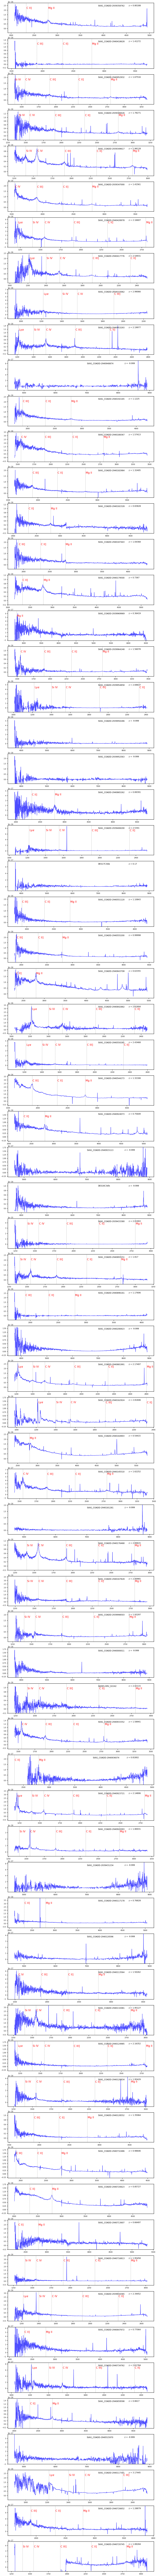

In [183]:
f = plt.figure(figsize=(16,288))
gs = gridspec.GridSpec(72, 2)
#gs.update(wspace=0.1, hspace=0.4)

for i in range(72):
    ax = plt.subplot(gs[i,:])
    name = data['col5'][i]
    ra = data['col1'][i]
    dec = data['col2'][i]
    redshift = data['col6'][i]
    flag = data['col7'][i]
    hdul = fits.open('/home/kaiwen/work/data/c3_catalog/calib_stacked/'+name+'_scaled.fits')
    #f = plt.figure(figsize=(16,4))
    lamda = hdul[1].data['lamda']
    flux = hdul[1].data['flux']
    if i >=70:
        flux_mod = cut_plot(flux,lamda,200)
    else:
        flux_mod = cut_plot(flux,lamda,50)
        
    if flag <3:
        ax.plot(lamda,smooth(flux_mod,5),lw=1.7,color='b',alpha=0.7)
    else:
        ax.plot(lamda/(1.+redshift),smooth(flux_mod,5),lw=1.7,color='b',alpha=0.7)
    #plt.plot(lamda,smooth(flux,5),lw=1.4,color='b',alpha=0.7)
    flux_mod = np.array(flux_mod)
    ind = np.where((np.isnan(flux_mod)),False,True)
    maximum = smooth(flux_mod[ind],6).max()
    minimum = -maximum/5
    #plt.xlim(3720,8970)
    ax.set_ylim(minimum/1.1,maximum*1.1)
    
    if flag >= 3:
        ax.text(7000/(1.+redshift),maximum*0.96,name,fontsize=12)
        ax.text(8200/(1.+redshift),maximum*0.96,"z = "+str(redshift),fontsize=12)
        for k in zip([1216,2800,1908,1549,1400,2327,4861,6563],[r'Ly$\alpha$','Mg II','C III]','C IV','Si IV','C II]','H beta','H alpha']):
            if (k[0] < 8950/(1.+redshift)) and (k[0] > 3740/(1.+redshift)):
                ax.plot([k[0],k[0]],[minimum,maximum*1.1],'k--',alpha=0.5,lw=0.8)
                ax.text(k[0]+5,maximum*0.85,str(k[1]),color='r',fontsize=16)
    else:
        ax.text(7000,maximum*0.95,name,fontsize=12)
        ax.text(8200,maximum*0.95,"z = "+str(redshift),fontsize=12)
        ax.text(7200,maximum*0.9,"ra/dec = "+str(redshift),fontsize=12)

In [184]:
f.savefig('/home/kaiwen/work/result/c3_spectra_v6.pdf')

In [20]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('multipage_pdf.pdf') as pdf:
    for i in range(72):
        name = data['col5'][i]
        ra = data['col1'][i]
        dec = data['col2'][i]
        redshift = data['col6'][i]
        flag = data['col7'][i]
        hdul = fits.open('/home/kaiwen/work/data/c3_catalog/calib_stacked/'+name+'_scaled.fits')
        f = plt.figure(figsize=(18,8))
        lamda = hdul[1].data['lamda']
        flux = hdul[1].data['flux']
        if i >=70:
            flux_mod = cut_plot(flux,lamda,200)
        else:
            flux_mod = cut_plot(flux,lamda,50)

        if flag <3:
            plt.plot(lamda,smooth(flux_mod,5),lw=1.7,color='b',alpha=0.7)
        else:
            plt.plot(lamda/(1.+redshift),smooth(flux_mod,5),lw=1.7,color='b',alpha=0.7)
        #plt.plot(lamda,smooth(flux,5),lw=1.4,color='b',alpha=0.7)
        flux_mod = np.array(flux_mod)
        ind = np.where((np.isnan(flux_mod)),False,True)
        maximum = smooth(flux_mod[ind],6).max()
        minimum = -maximum/5
        #plt.xlim(3720,8970)
        plt.ylim(minimum/1.1,maximum*1.1)

        if flag >= 3:
            plt.text(7000/(1.+redshift),maximum*0.96,name,fontsize=13)
            plt.text(8200/(1.+redshift),maximum*0.96,"z = "+str(redshift),fontsize=13)
            plt.text(7200/(1.+redshift),maximum*0.9,"ra/dec = "+str(np.round(ra,4))+','+str(np.round(dec,4)),fontsize=13)
            for k in zip([1216,2800,1908,1549,1400,2327,4861,6563],[r'Ly$\alpha$','Mg II','C III]','C IV','Si IV','C II]','H beta','H alpha']):
                if (k[0] < 8950/(1.+redshift)) and (k[0] > 3740/(1.+redshift)):
                    plt.plot([k[0],k[0]],[minimum,maximum*1.1],'k--',alpha=0.5,lw=0.8)
                    plt.text(k[0]+5,maximum*0.85,str(k[1]),color='r',fontsize=16)
        else:
            plt.text(7000,maximum*0.95,name,fontsize=13)
            plt.text(8200,maximum*0.95,"z = "+str(redshift),fontsize=13)
            plt.text(7200,maximum*0.9,"ra/dec = "+str(np.round(ra,4))+','+str(np.round(dec,4)),fontsize=13)
            
        pdf.savefig()
        plt.close()

/home/kaiwen/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
